In [9]:
#Rutas
grd = r'/home/brunoc/Documents/Universidad/2025/Taller de obtención y preparación de datos/Proyecto/Datos/Datos_Recortados_Columnas/grd_2023_saved.parquet'
hospital = r'/home/brunoc/Documents/Universidad/2025/Taller de obtención y preparación de datos/Proyecto/Datos/Datos_Recortados_Columnas/hospital.parquet'
ir_grd = r'/home/brunoc/Documents/Universidad/2025/Taller de obtención y preparación de datos/Proyecto/Datos/Datos_Recortados_Columnas/ir-grd.parquet'
cie = r'/home/brunoc/Documents/Universidad/2025/Taller de obtención y preparación de datos/Proyecto/Datos/Datos_Recortados_Columnas/CIE-10 (2).xlsx'


In [10]:
import pandas as pd
import numpy as numpy
import sklearn as skl



In [11]:
df_grd = pd.read_parquet(grd)
df_hospital = pd.read_parquet(hospital)
df_ir_grd = pd.read_parquet(ir_grd)
df_cie = pd.read_excel(cie, engine='openpyxl')
# hospital, ir_grd no tienen header

In [12]:
df_grd.head(2)

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,64161.0,0.7094,1.0,1.0,43.0,2
1,114101,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,41301.0,1.0869,1.0,1.0,22.0,6


In [13]:
df_grd['DIAS_ESTANCIA'].describe()

count    1.039587e+06
mean     5.796219e+00
std      1.234831e+01
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      6.960000e+02
Name: DIAS_ESTANCIA, dtype: float64

In [14]:
wn_loco = df_grd[df_grd['DIAS_ESTANCIA'] == 696]
wn_loco

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA
951917,121109,73287823.0,HOMBRE,1989-09-03,ARAUCANÍA SUR,URGENCIA,2022-01-13,2023-12-10,DOMICILIO,F20.9,194101.0,0.6824,1.0,1.0,32.0,696


In [15]:
df_cie['Código']

0          A00
1        A00.0
2        A00.1
3        A00.9
4          A01
         ...  
39868    Z99.2
39869    Z99.3
39870    Z99.4
39871    Z99.8
39872    Z99.9
Name: Código, Length: 39873, dtype: object

In [16]:
df_hospital.head(2)

,101100,Hospital Dr. Juan Noé Crevanni (Arica)
0,101203,Clínica Hebe
1,101212,Clínica San Agustín


In [17]:
df_ir_grd.head(2)

,11011,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES
0,11012,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W/CC
1,11013,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W...


In [18]:
df_ir_grd.columns = ['IR_29301_COD_GRD', 'DESCCRIPCION_GRD']
df_hospital.columns = ['COD_HOSPITAL', 'HOSPITAL']

In [19]:
df_ir_grd.head()

,IR_29301_COD_GRD,DESCCRIPCION_GRD
0,11012,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W/CC
1,11013,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W...
2,11101,PH CRANEOTOMÍA
3,11102,PH CRANEOTOMÍA W/CC
4,11103,PH CRANEOTOMÍA W/MCC


In [20]:
df_hospital.head()

,COD_HOSPITAL,HOSPITAL
0,101203,Clínica Hebe
1,101212,Clínica San Agustín
2,101213,Clínica San José
3,101215,Complejo Penitenciario
4,101237,Clínica Dr. Héctor Sánchez


Hace el super coso  
análisis de componentes  
ver que onda  


Realizamos el merge para obtener la información completa

In [21]:
print( f'''
grd = {df_grd.columns}
cie = {df_cie.columns}
hotpitales = {df_hospital.columns}
ir_grd = {df_ir_grd.columns}
''')


grd = Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHAALTA',
       'TIPOALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')
cie = Index(['Versión', 'Código', 'Descripción', 'Categoría', 'Sección', 'Capítulo'], dtype='object')
hotpitales = Index(['COD_HOSPITAL', 'HOSPITAL'], dtype='object')
ir_grd = Index(['IR_29301_COD_GRD', 'DESCCRIPCION_GRD'], dtype='object')



Hay que hacer el merge entre grd (grd['IR_29301_COD_GRD']) y ir_grd (ir_grd['IR_29301_COD_GRD']) y entre grd con hospitales entre ['COD_HOSPITAL'] DIAGNOSTICO1 del CIE es el código

In [22]:
# Limpiar nombres de columnas antes
for df in [df_grd, df_hospital, df_ir_grd, df_cie]:
    df.columns = df.columns.str.strip()

# Hacer los merges
df_grd = df_grd.merge(df_hospital, on='COD_HOSPITAL', how='left')
df_grd = df_grd.merge(df_ir_grd, on='IR_29301_COD_GRD', how='left')
df_grd = df_grd.merge(df_cie, left_on='DIAGNOSTICO1', right_on='Código', how='left')

# Luego eliminas columnas de unión
df_grd = df_grd.drop(columns=['COD_HOSPITAL', 'IR_29301_COD_GRD', 'DIAGNOSTICO1', 'Código'])
df_grd.head(2)

,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,HOSPITAL,DESCCRIPCION_GRD,Versión,Descripción,Categoría,Sección,Capítulo
0,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,0.7094,1.0,1.0,43.0,2,Hospital Clínico Regional (Valdivia),MH INFECCIONES GASTROINTESTINALES MAYORES,CIE-v2013,Apendicitis aguda con peritonitis localizada,K35 APENDICITIS AGUDA,K35-K38 ENFERMEDADES DEL APÉNDICE,Cap.11 ENFERMEDADES DEL APARATO DIGESTIVO (K0...
1,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,1.0869,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,CIE-v2013,Otros tipos de neumotórax espontáneo,J93 NEUMOTÓRAX,J90-J94 OTRAS ENFERMEDADES DE LA PLEURA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...


In [23]:
df_grd.columns

Index(['CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO', 'SERVICIO_SALUD',
       'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHAALTA', 'TIPOALTA',
       'IR_29301_PESO', 'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD',
       'DIAS_ESTANCIA', 'HOSPITAL', 'DESCCRIPCION_GRD', 'Versión',
       'Descripción', 'Categoría', 'Sección', 'Capítulo'],
      dtype='object')

In [24]:
df_grd.dropna(inplace=True);

In [25]:
df_grd['CIP_ENCRIPTADO'].duplicated().mean()*100

np.float64(20.990690045237752)

## Gepetiao

In [26]:
# Asegura el tipo datetime
df_grd['FECHA_INGRESO'] = pd.to_datetime(df_grd['FECHA_INGRESO'])
df_grd['FECHAALTA']     = pd.to_datetime(df_grd['FECHAALTA'])

# Ordena episodios dentro de cada paciente
df_sorted = (
    df_grd
      .sort_values(['CIP_ENCRIPTADO', 'FECHA_INGRESO'])
      .reset_index(drop=True)
)


In [27]:
# Fecha del próximo ingreso
df_sorted['NEXT_FECHA_INGRESO'] = (
    df_sorted
      .groupby('CIP_ENCRIPTADO')['FECHA_INGRESO']
      .shift(-1)                       # episodio siguiente
)

# Diferencia en días (sólo si hay próximo episodio)
df_sorted['DIAS_REINGRESO'] = (
    (df_sorted['NEXT_FECHA_INGRESO'] - df_sorted['FECHAALTA'])
      .dt.days
)


In [28]:
mask_gap_ok = df_sorted['DIAS_REINGRESO'] >= 0
df_gaps     = df_sorted[mask_gap_ok].copy()


In [29]:
n_total_ep      = len(df_sorted)                    # todos los episodios
n_con_gap       = len(df_gaps)                      # episodios con reingreso calculable
pct_ep_con_gap  = n_con_gap / n_total_ep * 100

n_pac_total     = df_sorted['CIP_ENCRIPTADO'].nunique()
n_pac_multiep   = df_sorted.loc[mask_gap_ok, 'CIP_ENCRIPTADO'].nunique()
pct_pac_multiep = n_pac_multiep / n_pac_total * 100


In [30]:
n_total_ep, n_con_gap, pct_ep_con_gap, n_pac_total, n_pac_multiep, pct_pac_multiep

(1017513, 210264, 20.664502566551977, 803930, 146848, 18.266266963541604)

In [31]:
# --- parámetros ---
WINDOWS = [7, 30, 60, 90]          # puedes añadir 14, 180, etc.

# --- función auxiliar: True si reingresa en ≤ w días ---
def etiqueta_reingreso_episodio(df, w):
    # 1) Si DIAS_REINGRESO es NaN  -> no se observó reingreso (False)
    # 2) Si gap >= 0 y <= w        -> True
    return (df['DIAS_REINGRESO'] <= w).fillna(False)

# --- crear etiquetas ---
for w in WINDOWS:
    df_sorted[f'READM_{w}D'] = etiqueta_reingreso_episodio(df_sorted, w).astype(int)


In [32]:
df_sorted.head(2)

,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,IR_29301_PESO,IR_29301_SEVERIDAD,...,Descripción,Categoría,Sección,Capítulo,NEXT_FECHA_INGRESO,DIAS_REINGRESO,READM_7D,READM_30D,READM_60D,READM_90D
0,66988016.0,MUJER,1957-05-01,COQUIMBO,URGENCIA,2023-12-25,2023-12-28,HOSPITALIZACIÓN DOMICILIARIA,0.5799,1.0,...,Cálculo de conducto biliar sin colangitis ni c...,K80 COLELITIASIS,"K80-K87 TRASTORNOS DE LA VESÍCULA BILIAR, VÍA...",Cap.11 ENFERMEDADES DEL APARATO DIGESTIVO (K0...,NaT,NaN,0,0,0,0
1,66988070.0,HOMBRE,1977-07-12,METROPOLITANO SURORIENTE,URGENCIA,2023-03-29,2023-04-13,DOMICILIO,1.1263,3.0,...,Falla y rechazo de trasplante de riñón,T86 FALLA Y RECHAZO DEL TRASPLANTE DE ÓRGANOS ...,T80-T88 COMPLICACIONES DE LA ATENCIÓN QUIRÚRG...,"Cap.19 LESIONES TRAUMÁTICAS, ENVENENAMIENTOS ...",2023-06-22,70.0,0,0,0,1


In [33]:
# Solo con reingresos #
df_util = df_sorted[df_sorted['DIAS_REINGRESO'] > 0].copy()


In [37]:
df_util.head(2)

,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,IR_29301_PESO,IR_29301_SEVERIDAD,...,Descripción,Categoría,Sección,Capítulo,NEXT_FECHA_INGRESO,DIAS_REINGRESO,READM_7D,READM_30D,READM_60D,READM_90D
1,66988070.0,HOMBRE,1977-07-12,METROPOLITANO SURORIENTE,URGENCIA,2023-03-29,2023-04-13,DOMICILIO,1.1263,3.0,...,Falla y rechazo de trasplante de riñón,T86 FALLA Y RECHAZO DEL TRASPLANTE DE ÓRGANOS ...,T80-T88 COMPLICACIONES DE LA ATENCIÓN QUIRÚRG...,"Cap.19 LESIONES TRAUMÁTICAS, ENVENENAMIENTOS ...",2023-06-22,70.0,0,0,0,1
3,66988091.0,MUJER,1957-11-01,LIBERTADOR B. O HIGGINS,PROGRAMADA,2023-07-17,2023-07-17,DOMICILIO,0.8479,0.0,...,"Diabetes mellitus, no especificada, con compli...","E14 DIABETES MELLITUS, NO ESPECIFICADA",E08-E14 DIABETES MELLITUS,"Cap.04 ENFERMEDADES ENDOCRINAS, NUTRICIONALES...",2023-08-19,33.0,0,0,1,1


<Axes: >

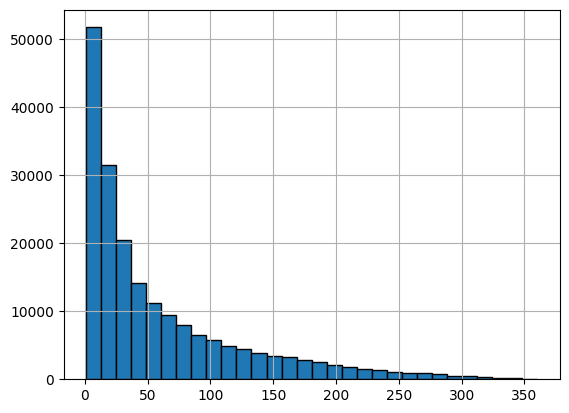

In [36]:
df_util['DIAS_REINGRESO'].describe()
df_util['DIAS_REINGRESO'].hist(bins=30, edgecolor='black')

In [ ]:
# --- guardar ---
df_sorted.to_parquet(
    '/home/brunoc/Documents/Universidad/2025/Taller de obtención y preparación de datos/Proyecto/Datos/Datos/new_grd.parquet',
    index=False
)


In [ ]:
df_grd.loc[df_grd['CIP_ENCRIPTADO'] == 66988070.0]

,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,HOSPITAL,DESCCRIPCION_GRD,Versión,Descripción,Categoría,Sección,Capítulo
903257,66988070.0,HOMBRE,1977-07-12,METROPOLITANO SURORIENTE,URGENCIA,2023-03-29,2023-04-13,DOMICILIO,1.1263,3.0,2.0,46.0,15,Complejo Hospitalario Dr. Sótero del Río (San...,"MH DISFUNCIÓN, REACCIÓN O COMPL. POR DISP., I...",CIE-v2013,Falla y rechazo de trasplante de riñón,T86 FALLA Y RECHAZO DEL TRASPLANTE DE ÓRGANOS ...,T80-T88 COMPLICACIONES DE LA ATENCIÓN QUIRÚRG...,"Cap.19 LESIONES TRAUMÁTICAS, ENVENENAMIENTOS ..."
965385,66988070.0,HOMBRE,1977-07-12,METROPOLITANO SURORIENTE,URGENCIA,2023-06-22,2023-06-30,FALLECIDO,2.1123,3.0,3.0,46.0,8,Complejo Hospitalario Dr. Sótero del Río (San...,PH PROCEDIMIENTOS NO COMPLEJOS SOBRE APARATO ...,CIE-v2013,Neumonitis debida a aspiración de alimento o v...,J69 NEUMONITIS DEBIDA A SÓLIDOS Y LÍQUIDOS,J60-J70 ENFERMEDADES PULMONARES POR AGENTES E...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...
